# Cleaning the initial files

Within this file, we will try to clean the variables as much as possible.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import missingno as msno

## Establishing save area

Here we will set up a save folder to put the newly cleaned features so that we always have access to the raw, uncleaned files

In [2]:
save_name = "Clean_Files"
os.makedirs(save_name, exist_ok = True)

save_path = save_name + "/"

Files that we will be cleaning

In [3]:
original_path = "UT_BestFrac_Dataset/"

files = [
    "cross_bu_dnc_stim_stage_detail.xlsx",
    "gcbu_dnc_recompletions.xlsx",
    "gcbu_dnc_stim_stage.xlsx",
    "monthly_production.xlsx"
]

### File 1, cross_bu_dnc_stim_stage_detail

In [4]:
df_1 = pd.read_excel(original_path + files[0])

<AxesSubplot:>

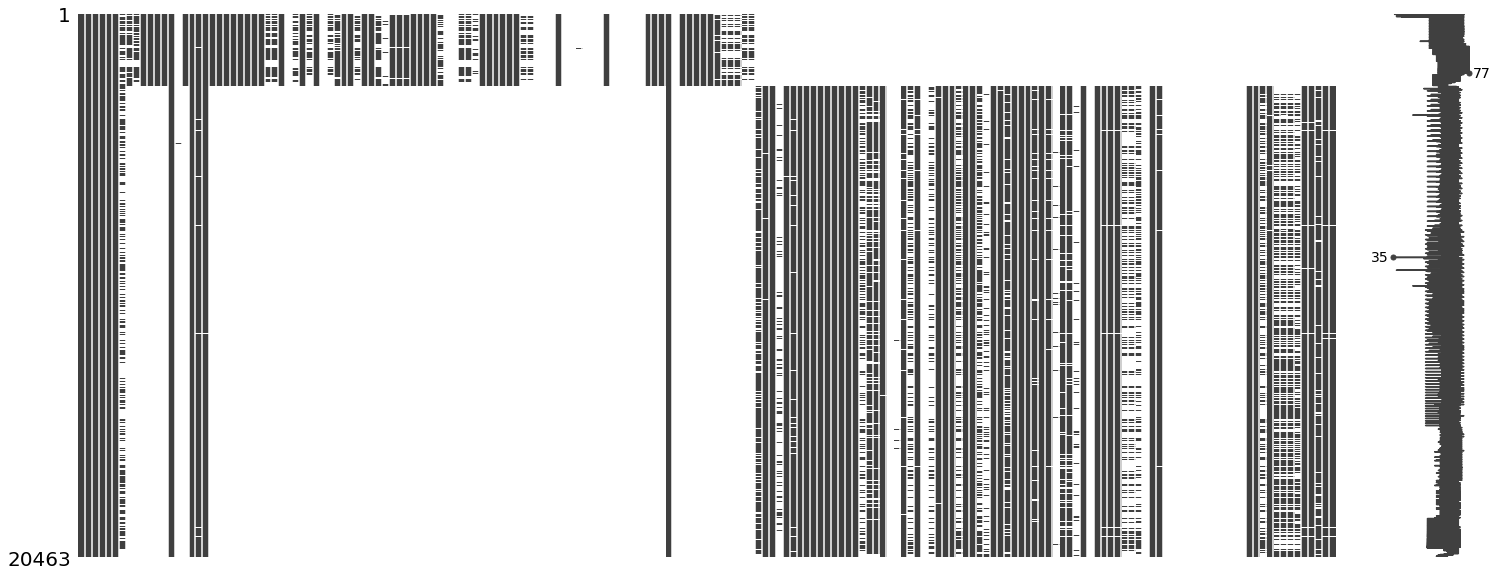

In [5]:
#First we want to see the originial state of the file
msno.matrix(df_1)

Here we see that there is a clear divide between the data. There is a top, and a bottom part of the data. The way we will deal with this for now is by just splitting the top and the bottom and treating them as separate files.

After further inspection of the file, this divide happens at entry 2743.

In [6]:
df_1_top = df_1.iloc[:2742,:]
df_1_bot = df_1.iloc[2742:,:]

<AxesSubplot:>

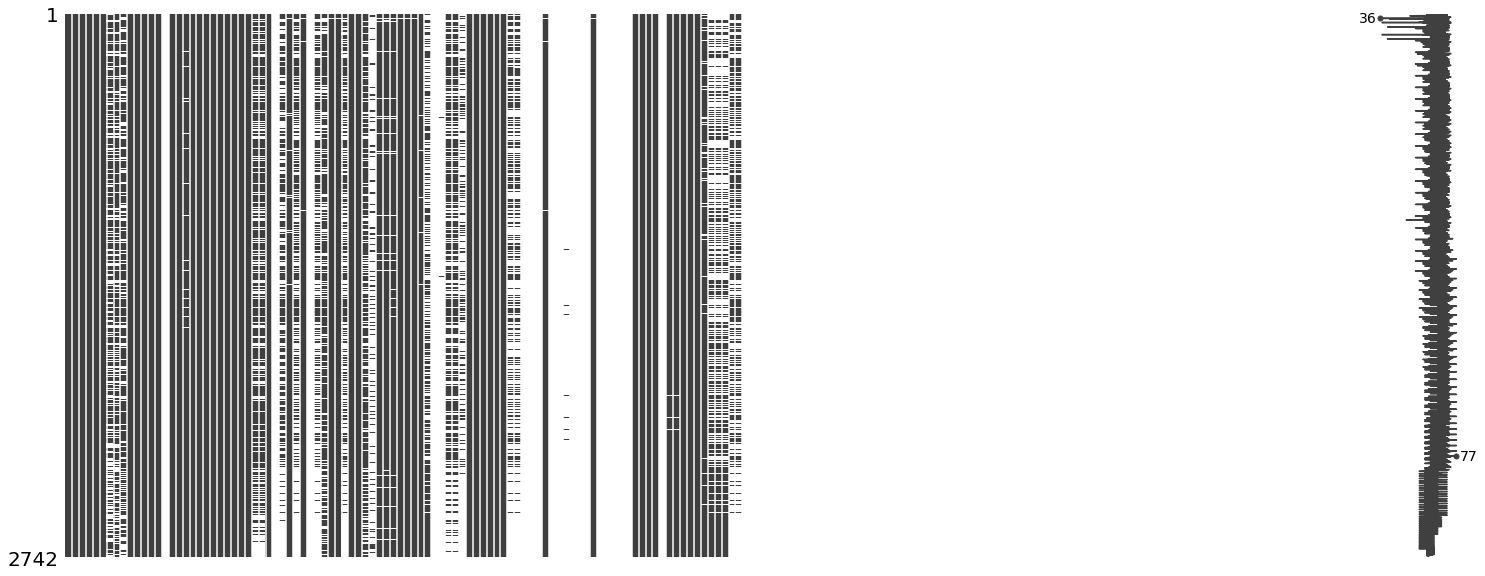

In [7]:
msno.matrix(df_1_top)

<AxesSubplot:>

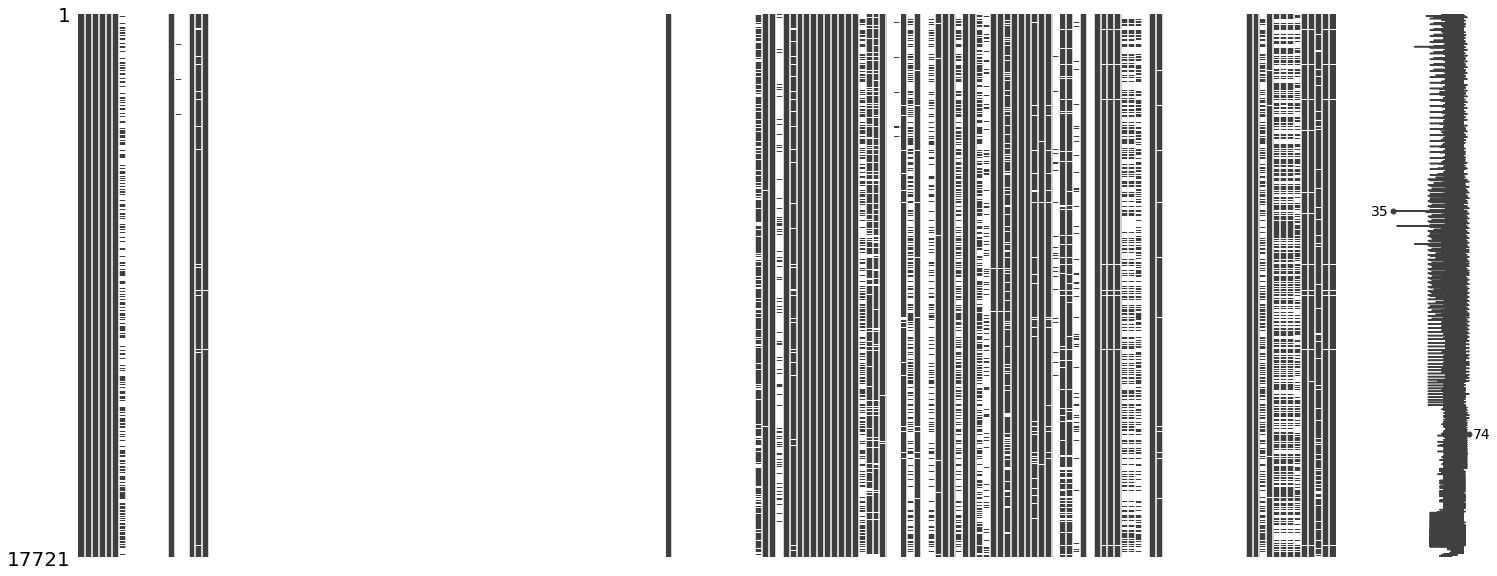

In [8]:
msno.matrix(df_1_bot)

Now that the two aspects of the first file are separated, we can go about and just remove features that are completely empty.

In [9]:
df_1_top = df_1_top.dropna(axis=1, how="all")
df_1_bot = df_1_bot.dropna(axis=1, how="all")

<AxesSubplot:>

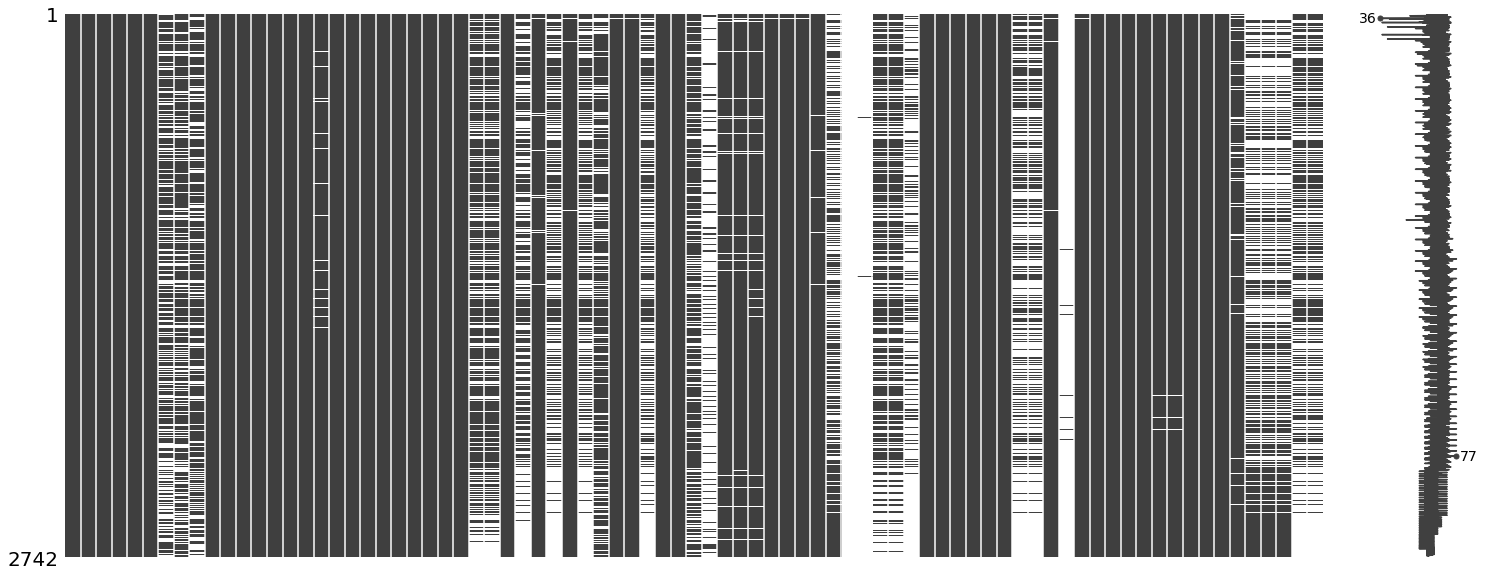

In [10]:
msno.matrix(df_1_top)

<AxesSubplot:>

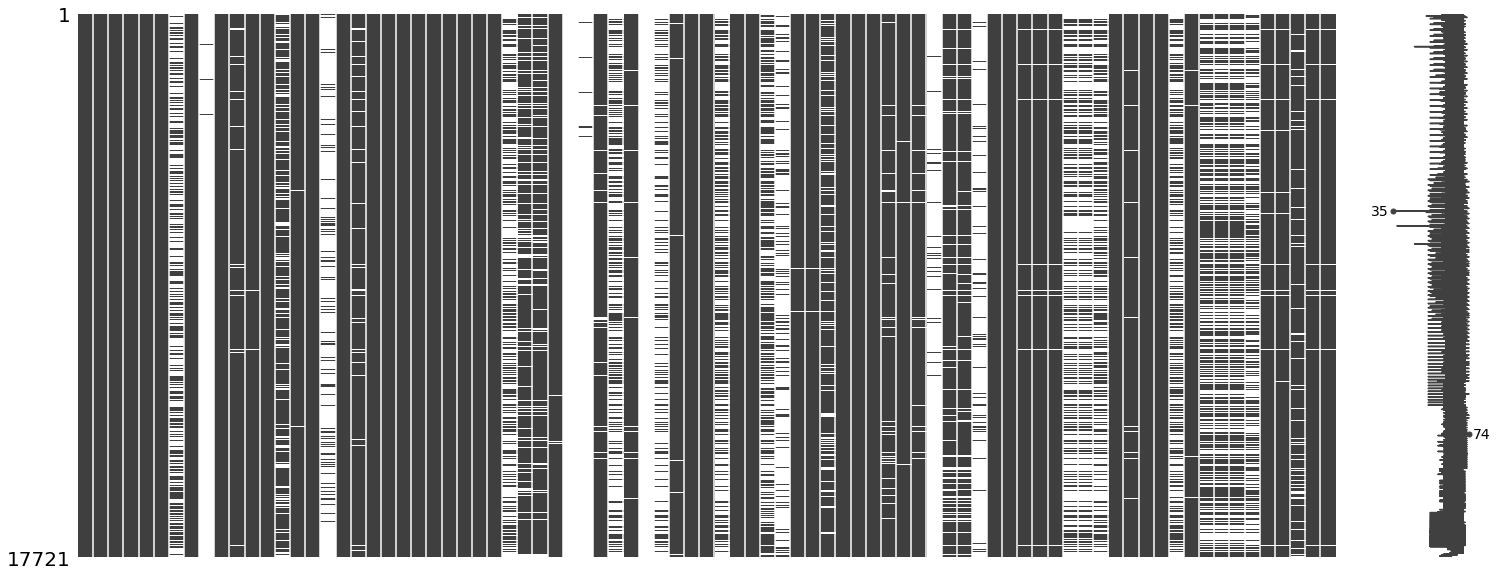

In [11]:
msno.matrix(df_1_bot)

Next, we're interested in finding out the percentage missing for the remaining features to determine which other features to drop. This is because if there is a feature that only has 1 or 2 different entries filled in, it's not worth trying to interpolate the rest of the values

In [12]:
df_1_top_missing = pd.DataFrame(columns=["Feature", "# Missing", "% Missing"])

num_nan = df_1_top.isnull().sum(axis=0)

for index in range(0, len(df_1_top.columns)):
    df_1_top_missing.loc[index, "Feature"] = df_1_top.columns[index]
    df_1_top_missing.loc[index, "# Missing"] = num_nan[index]
    df_1_top_missing.loc[index, "% Missing"] = num_nan[index]/len(df_1_top.index)
df_1_top_missing = df_1_top_missing.sort_values(by = ["% Missing"], ascending = False, ignore_index = True)

In [13]:
df_1_top_missing

,Feature,# Missing,% Missing
0,STIM_INT_PRE_INST_SHUT_IN_PRESS,2741,0.999635
1,STIM_INT_SHUT_IN_TIME_FINAL,2727,0.99453
2,STIM_INT_AVG_CASING_PRESS,2689,0.980671
3,STIM_INT_PROPPANT_RETURN_TO_SURF,2278,0.83078
4,STIM_INT_RESULT_NOTE,2083,0.759664
...,...,...,...
76,DAILY_OPS_START_DATE,0,0
77,DAILY_OPS_END_DATE,0,0
78,STIM_INT_START_DATE,0,0
79,STIM_INT_END_DATE,0,0


In [14]:
df_1_bot_missing = pd.DataFrame(columns=["Feature", "# Missing", "% Missing"])

num_nan = df_1_bot.isnull().sum(axis=0)

for index in range(0, len(df_1_bot.columns)):
    df_1_bot_missing.loc[index, "Feature"] = df_1_bot.columns[index]
    df_1_bot_missing.loc[index, "# Missing"] = num_nan[index]
    df_1_bot_missing.loc[index, "% Missing"] = num_nan[index]/len(df_1_bot.index)
df_1_bot_missing = df_1_bot_missing.sort_values(by = ["% Missing"], ascending = False, ignore_index = True)

In [15]:
df_1_bot_missing

,Feature,# Missing,% Missing
0,CLOSURE_PRESSURE,17720,0.999944
1,EST_SAND_TOP_DEPTH,17713,0.999549
2,JOB_OP_SUBCODE,17688,0.998138
3,FRAC_DIAGNOSTIC_METHOD,17571,0.991535
4,SHUT_IN_TIME_FINAL,17217,0.971559
...,...,...,...
78,STIMULATION_TREAT_TYPE,0,0
79,CURRENT_STATUS,0,0
80,STG_START_DATE,0,0
81,STG_NUMBER,0,0


In [16]:
df_1_top_missing = df_1_top_missing[df_1_top_missing["% Missing"] > .90]
df_1_top_remove = df_1_top_missing["Feature"].tolist()

In [17]:
df_1_bot_missing = df_1_bot_missing[df_1_bot_missing["% Missing"] > .90]
df_1_bot_remove = df_1_bot_missing["Feature"].tolist()

In [18]:
df_1_top = df_1_top.drop(columns = df_1_top_remove)
df_1_bot = df_1_bot.drop(columns = df_1_bot_remove)

In [19]:
df_1_top.columns

Index(['#WELL_NAME', 'CURRENT_STATUS', 'UWI', 'UWI_SIDETRACK', 'JOB_CATEGORY',
       'JOB_START_DATE', 'JOB_END_DATE', 'FINAL_JOB_STATUS', 'LIKE_KIND_GROUP',
       'PRIMARY_JOB_TYPE', 'JOB_PHASE_ACTUAL_START_DATE',
       'JOB_PHASE_ACTUAL_END_DATE', 'JOB_PHASE', 'JOB_OP_CODE', 'RIG_NAME',
       'RIG_ACCEPT_DATE', 'RIG_RELEASE_DATE', 'RIG_TYPE', 'RIG_CONTRACTOR',
       'DAILY_OPS_START_DATE_YEAR', 'DAILY_OPS_START_DATE',
       'DAILY_OPS_END_DATE', 'STIM_INT_START_DATE', 'STIM_INT_END_DATE',
       'STIM_INT_TREAT_TYPE', 'STIM_COMPANY', 'STIM_DIVERSION_COMPANY',
       'STIM_DIVERSION_METHOD', 'STIM_INT_DELIVERY_MODE',
       'STIM_INT_DIAGNOSTIC_METHOD', 'STIM_INT_FRAC_GRADIENT',
       'STIM_INT_BTM_HOLE_PRESS_METHOD', 'BREAKDOWN_PRESS',
       'STIM_INT_CLOSURE_PRESS_METHOD', 'STIM_INT_HYDROSTATIC_PRESS',
       'STIM_INT_TREAT_AVG_PRESS', 'STIM_INT_TREAT_MAX_PRESS',
       'STIM_INT_TREAT_MIN_PRESS', 'STIM_INT_PROPPANT_DESIGNED',
       'STIM_INT_PROPPANT_TOTAL', 'STIM_INT_PRO

In [20]:
df_1_bot.columns

Index(['#WELL_NAME', 'CURRENT_STATUS', 'UWI', 'UWI_SIDETRACK', 'JOB_CATEGORY',
       'JOB_START_DATE', 'JOB_END_DATE', 'JOB_OP_CODE', 'RIG_ACCEPT_DATE',
       'RIG_RELEASE_DATE', 'RIG_TYPE', 'STIMTREAT_ID', 'JOB_STATUS',
       'LIKE_KIND', 'PROJECT_TYPE', 'PROJECT_SUBTYPE', 'PHASE_START_DATE',
       'PHASE_END_DATE', 'PHASE', 'RIG_ID', 'CONTRACTOR',
       'REPORT_START_DATE_YEAR', 'REPORT_START_DATE', 'REPORT_END_DATE',
       'STIMULATION_TREAT_DATE', 'STIMULATION_TREAT_TYPE',
       'STIM_TREAT_COMPANY', 'STIM_TREAT_SUPERVISOR', 'DIVERSION_COMPANY',
       'DIVERSION_METHOD', 'DELIVERY_MODE', 'FRAC_GRADIENT',
       'BOTTOM_HOLE_PRESSURE_METHOD', 'BREAKDOWN_PRESSURE',
       'CLOSURE_PRESSURE_METHOD', 'HYDROSTATIC_PRESSURE', 'TREAT_AVG_PRESSURE',
       'TREAT_MAX_PRESSURE', 'TREAT_MIN_PRESSURE', 'PROPPANT_DESIGNED',
       'PROPPANT_IN_FORMATION', 'PROPPANT_IN_WELLBORE',
       'PROPPANT_RETURN_TO_SURFACE', 'AVG_HYDRAULIC_POWER', 'MAX_PUMP_POWER',
       'MAX_PUMP_RATING', 'TRE

<AxesSubplot:>

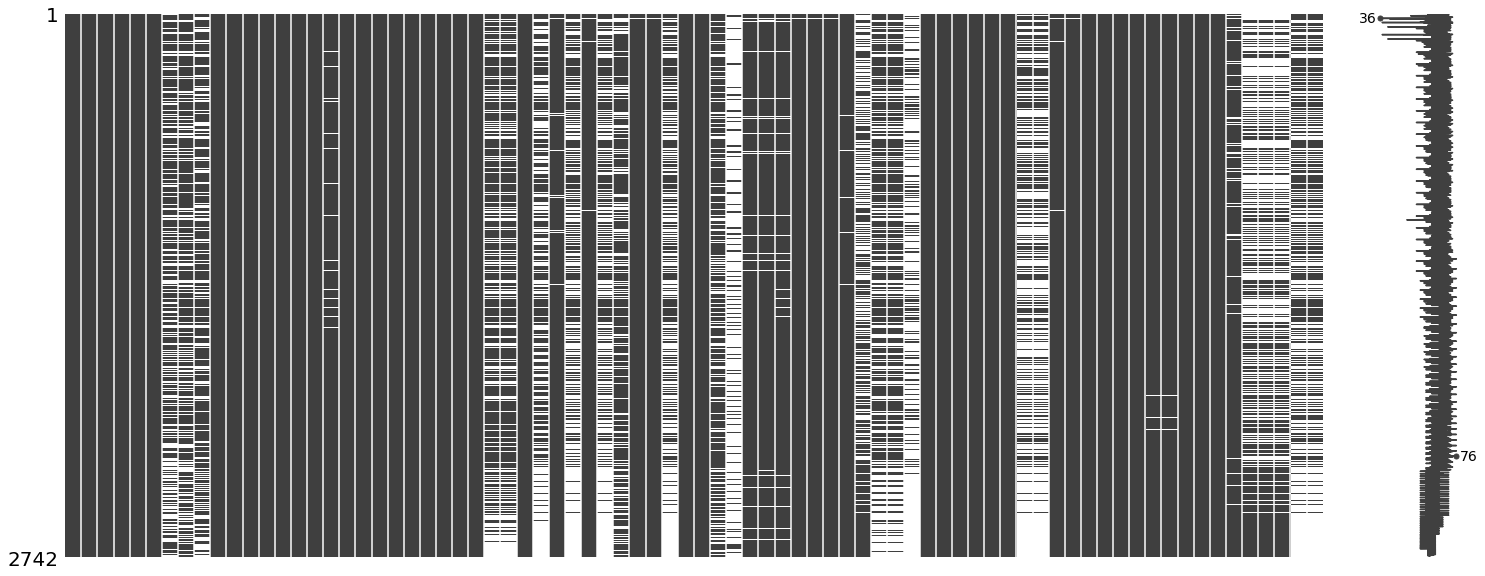

In [21]:
msno.matrix(df_1_top)

<AxesSubplot:>

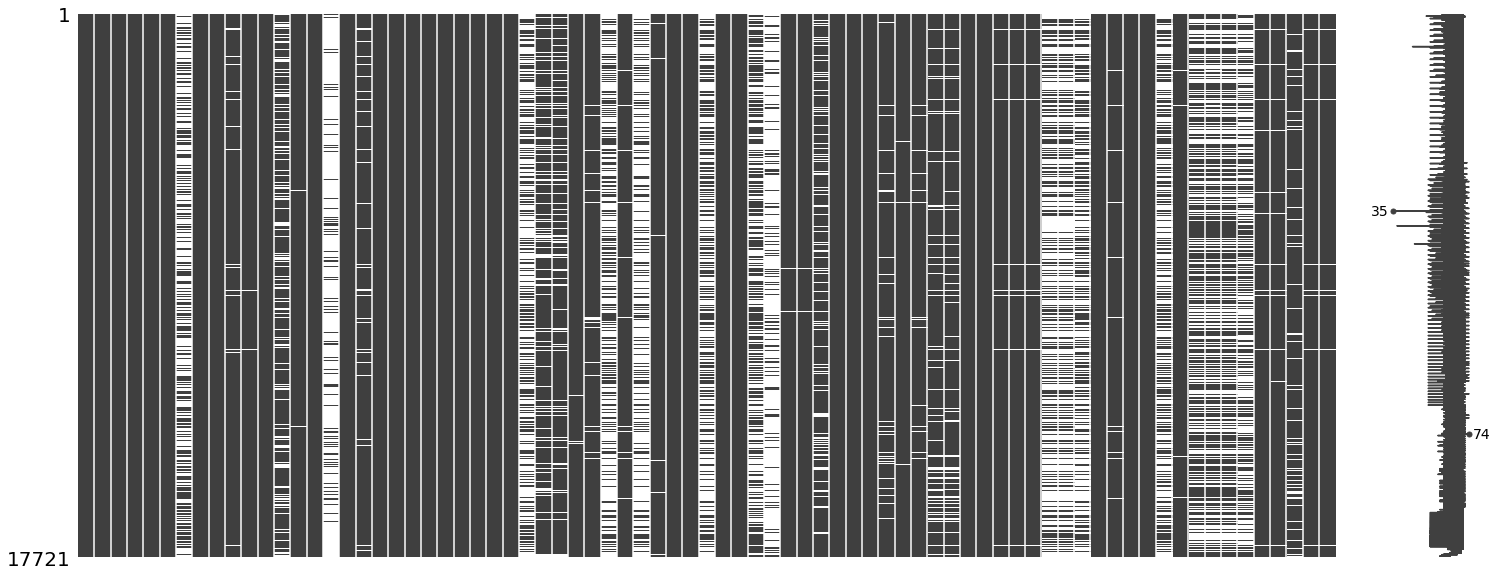

In [22]:
msno.matrix(df_1_bot)

In [23]:
df_1_top.reset_index();
df_1_bot.reset_index();

In [24]:
df_1_top.to_excel(save_path + "clean_top" + files[0],index=False)
df_1_bot.to_excel(save_path + "clean_bot" + files[0],index=False)

### File 2, gcbu_dnc_recompletions

In [25]:
df_2 = pd.read_excel(original_path + files[1])

<AxesSubplot:>

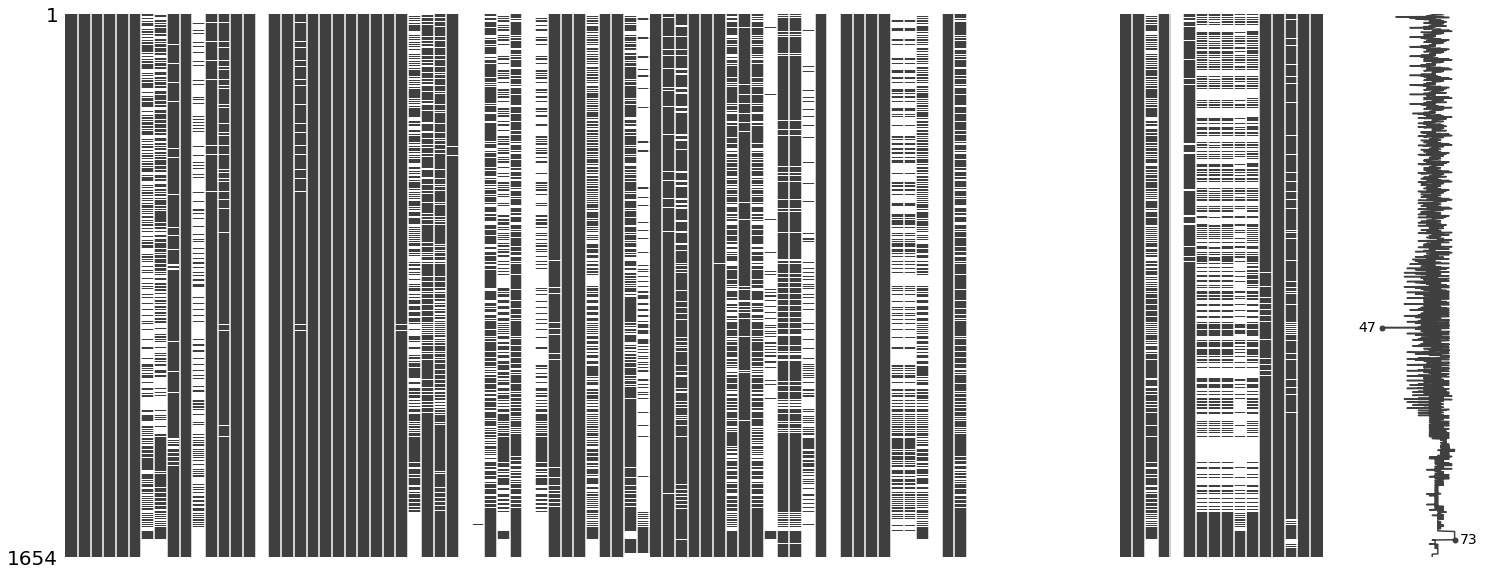

In [26]:
msno.matrix(df_2)

Remove features that are completely empty.

In [27]:
df_2 = df_2.dropna(axis=1, how="all")

<AxesSubplot:>

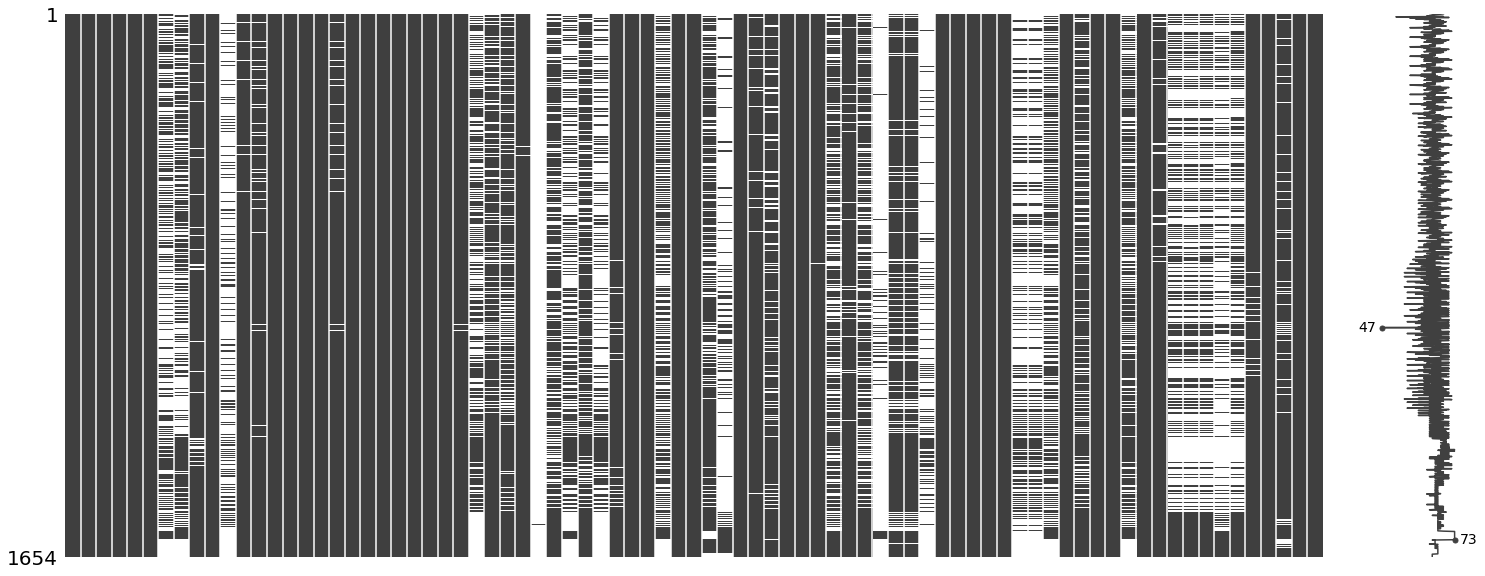

In [28]:
msno.matrix(df_2)

Now we want to drop certain features that are below a certain percentage

In [29]:
df_2_missing = pd.DataFrame(columns=["Feature", "# Missing", "% Missing"])

num_nan = df_2.isnull().sum(axis=0)

for index in range(0, len(df_2.columns)):
    df_2_missing.loc[index, "Feature"] = df_2.columns[index]
    df_2_missing.loc[index, "# Missing"] = num_nan[index]
    df_2_missing.loc[index, "% Missing"] = num_nan[index]/len(df_2.index)
df_2_missing = df_2_missing.sort_values(by = ["% Missing"], ascending = False, ignore_index = True)

In [30]:
df_2_missing

,Feature,# Missing,% Missing
0,FRAC_DIAGNOSTIC_METHOD,1653,0.999395
1,SHUT_IN_TIME_FINAL,1501,0.907497
2,STIMULATION_RESULT_NOTE,1368,0.827086
3,PROJECT_SUBTYPE,1303,0.787787
4,PROPPANT_RETURN_TO_SURFACE,1288,0.778718
...,...,...,...
76,STIMULATION_TREAT_DATE,0,0
77,STIMULATION_TREAT_TYPE,0,0
78,CURRENT_STATUS,0,0
79,STG_NUMBER,0,0


Here we will be dropping the features with over 90% missing percentage

In [31]:
df_2_missing = df_2_missing[df_2_missing["% Missing"] > .90]
df_2_remove = df_2_missing["Feature"].tolist()

In [32]:
df_2 = df_2.drop(columns = df_2_remove)

<AxesSubplot:>

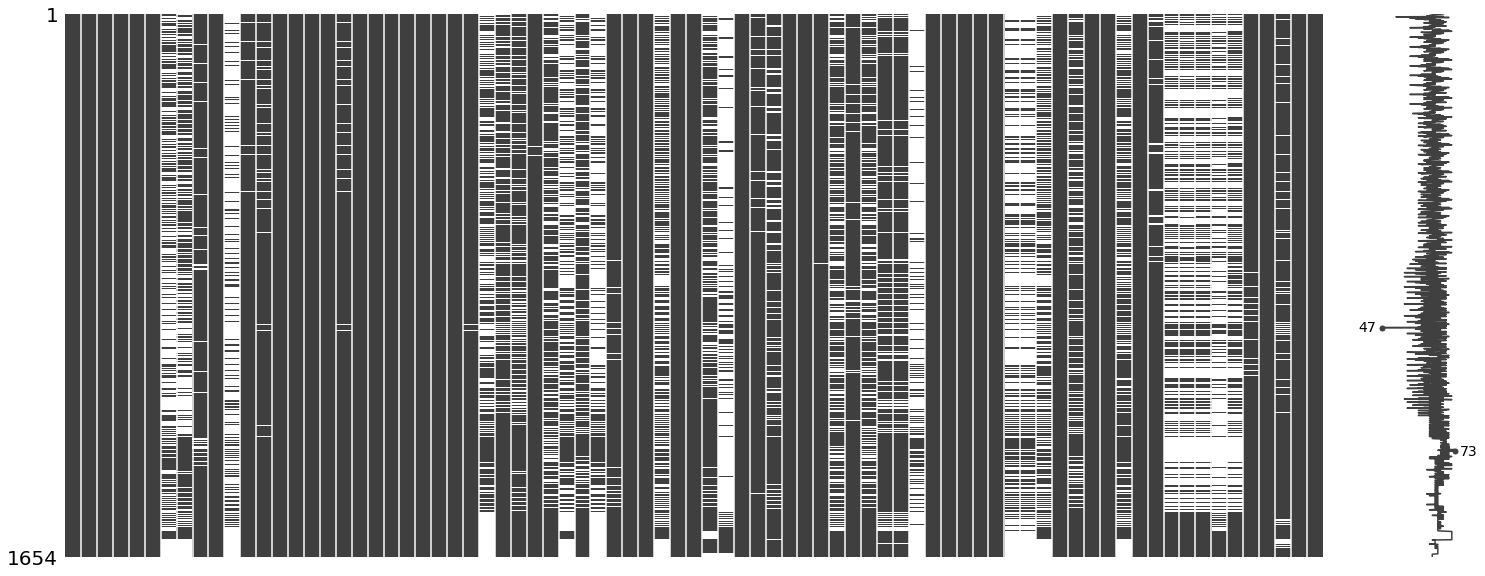

In [33]:
msno.matrix(df_2)

In [34]:
df_2.to_excel(save_path + "clean_" + files[1],index=False)

### File 3, gcbu_dnc_stim_stage

In [35]:
df_3 = pd.read_excel(original_path + files[2])

<AxesSubplot:>

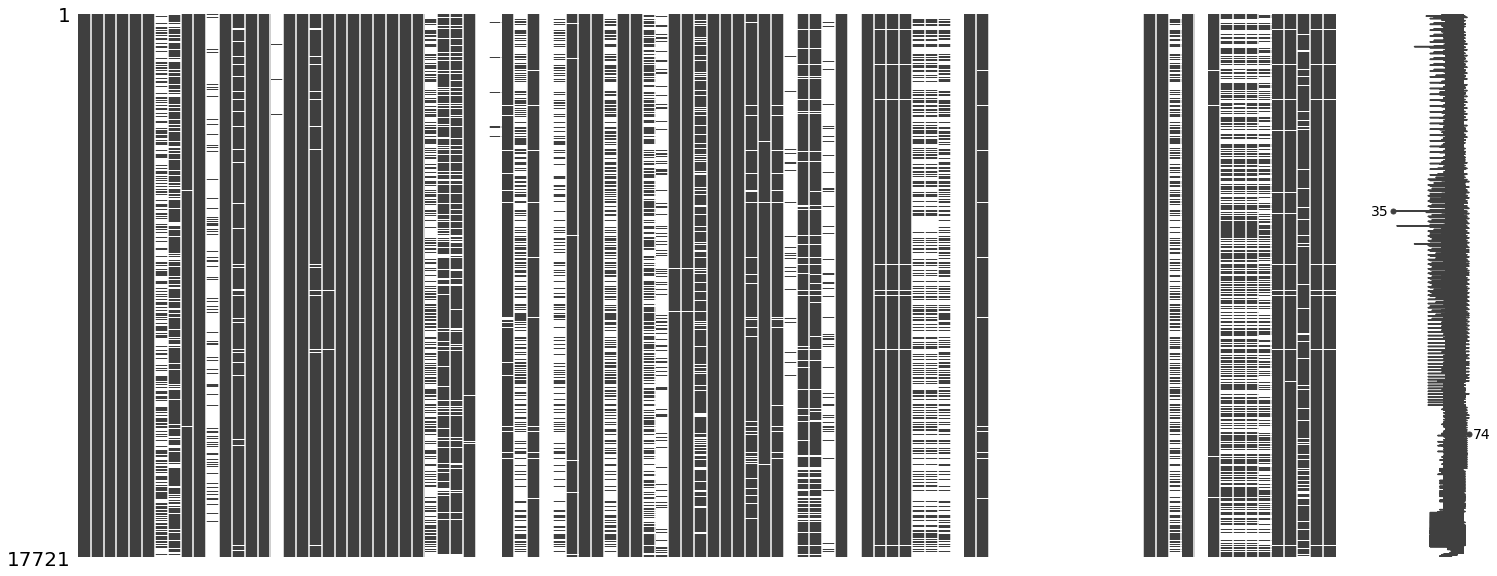

In [36]:
msno.matrix(df_3)

Remove completely empty features

In [37]:
df_3 = df_3.dropna(axis=1, how="all")

<AxesSubplot:>

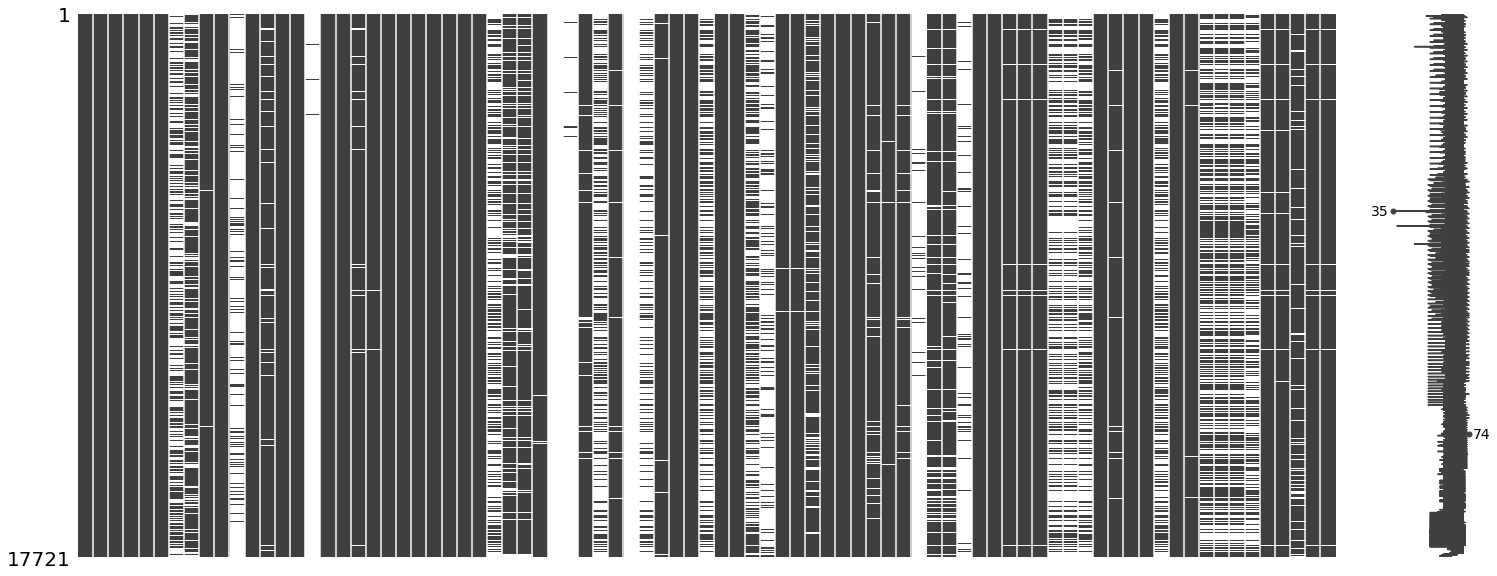

In [38]:
msno.matrix(df_3)

In [39]:
df_3_missing = pd.DataFrame(columns=["Feature", "# Missing", "% Missing"])

num_nan = df_3.isnull().sum(axis=0)

for index in range(0, len(df_3.columns)):
    df_3_missing.loc[index, "Feature"] = df_3.columns[index]
    df_3_missing.loc[index, "# Missing"] = num_nan[index]
    df_3_missing.loc[index, "% Missing"] = num_nan[index]/len(df_3.index)
df_3_missing = df_3_missing.sort_values(by = ["% Missing"], ascending = False, ignore_index = True)

In [40]:
df_3_missing

,Feature,# Missing,% Missing
0,CLOSURE_PRESSURE,17720,0.999944
1,EST_SAND_TOP_DEPTH,17713,0.999549
2,JOB_OP_SUBCODE,17688,0.998138
3,FRAC_DIAGNOSTIC_METHOD,17571,0.991535
4,SHUT_IN_TIME_FINAL,17217,0.971559
...,...,...,...
78,REPORT_END_DATE,0,0
79,STIMULATION_TREAT_DATE,0,0
80,STIMULATION_TREAT_TYPE,0,0
81,CURRENT_STATUS,0,0


In [41]:
df_3_missing = df_3_missing[df_3_missing["% Missing"] > .90]
df_3_remove = df_3_missing["Feature"].tolist()

In [42]:
df_3 = df_3.drop(columns = df_3_remove)

<AxesSubplot:>

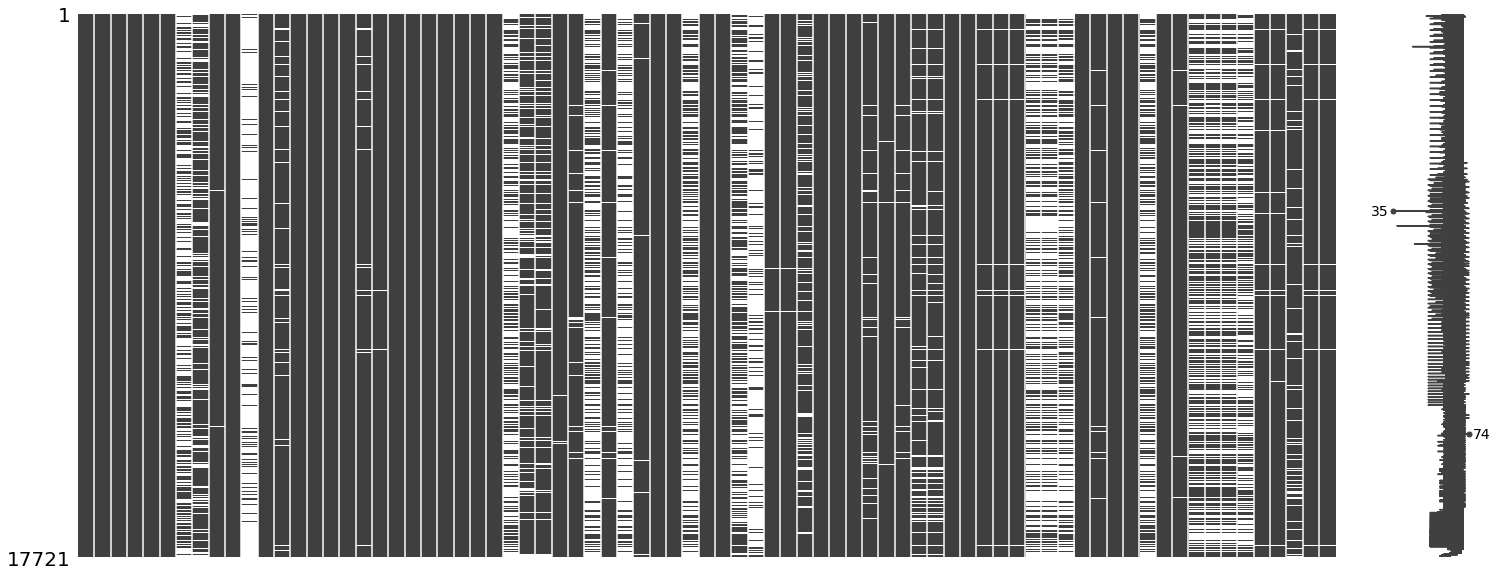

In [43]:
msno.matrix(df_3)

In [44]:
df_3.to_excel(save_path + "clean_" + files[2],index=False)

### File 4, monthly_production

In [45]:
df_4 = pd.read_excel(original_path + files[3])

<AxesSubplot:>

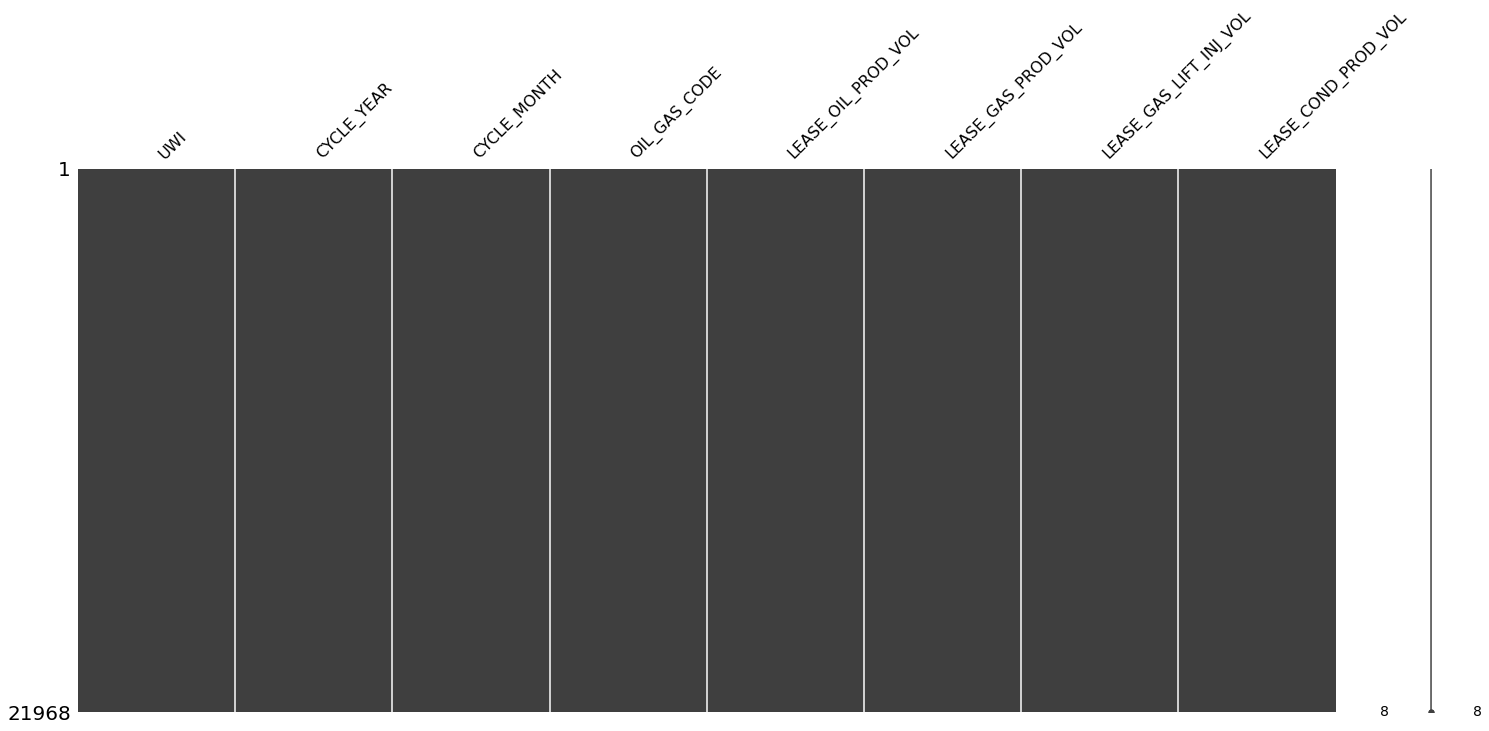

In [46]:
msno.matrix(df_4)

Nothing needs to be done

In [47]:
df_4.to_excel(save_path + "clean_" + files[3],index=False)